# Project 3 Stereo camera calibration

This week you'll be provided with a set of stereo images, and your task is to undistort and rectify the images, such that they can be used with the stereo depth reconstruction you made on day 6. You are still not allowed to use opencv functions for block matching/template matching, however you are free to use opencv when undistorting the images. It is recommended that you finish the exercises from Monday before continuing with the weekly project.

The image sets are found in the attached zip-file. Start with the rs.zip and move on to mynteye.zip once you have it working. The physical dimensions of each square of the pattern are 33.6 x 33.6 mm.

Hint: You'll have to undistort the images before rectifying them.

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn import linear_model

### 1 Rectify the image

First we need to extract matching points from different images, needed to estimate the K matrix.
- Also, assume the K matrix is the same for both cameras (same camera!)

In [15]:
"""
Implement the number of vertical and horizontal corners
"""
nb_vertical = 9
nb_horizontal = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('rs/left*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    """
    Implement findChessboardCorners here
    """
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [16]:
ret, mtx_left, dist_left, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('rs/left-0000.png')
h,  w = img.shape[:2]
K_left, roi = cv2.getOptimalNewCameraMatrix(mtx_left,dist_left,(w,h),1,(w,h))

Text(0.5, 1.0, 'Undistorted image')

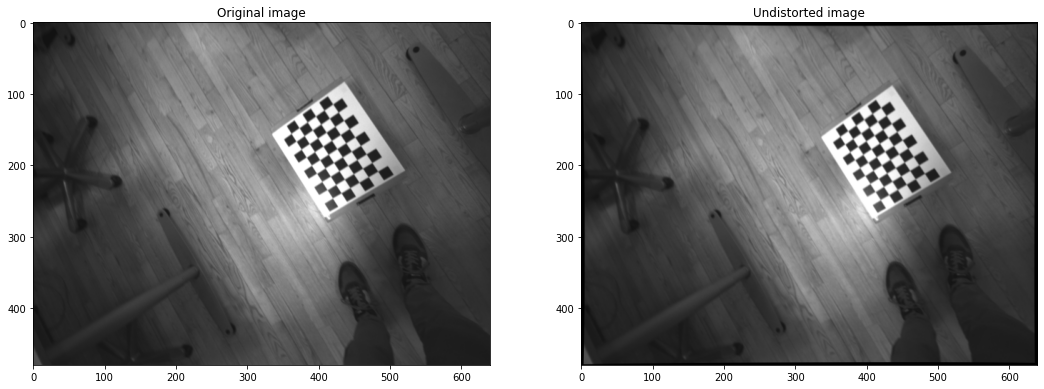

In [17]:
# undistort
dst = cv2.undistort(img, mtx_left, dist_left, None, K_left)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

Now with the right images

In [19]:
"""
Implement the number of vertical and horizontal corners
"""
nb_vertical = 9
nb_horizontal = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('rs/right*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    """
    Implement findChessboardCorners here
    """
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

In [20]:
ret, mtx_right, dist_right, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('rs/right-0000.png')
h,  w = img.shape[:2]
K_right, roi = cv2.getOptimalNewCameraMatrix(mtx_right,dist_right,(w,h),1,(w,h))

In [21]:
K_right, mtx_right, dist_right

(array([[368.22756958,   0.        , 322.73204455],
        [  0.        , 368.8453064 , 245.85216099],
        [  0.        ,   0.        ,   1.        ]]),
 array([[375.12051579,   0.        , 321.7664807 ],
        [  0.        , 375.43831995, 244.0632177 ],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.0027914 , -0.01328751,  0.00292249,  0.00138688,  0.00552691]]))

In [22]:
K_left, mtx_left, dist_left

(array([[365.89266968,   0.        , 324.62721633],
        [  0.        , 366.50601196, 247.47156052],
        [  0.        ,   0.        ,   1.        ]]),
 array([[374.15541242,   0.        , 322.54590143],
        [  0.        , 374.76827228, 245.03655094],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.00355685, -0.00809662,  0.00356797,  0.00232191,  0.00040122]]))

Text(0.5, 1.0, 'Undistorted image')

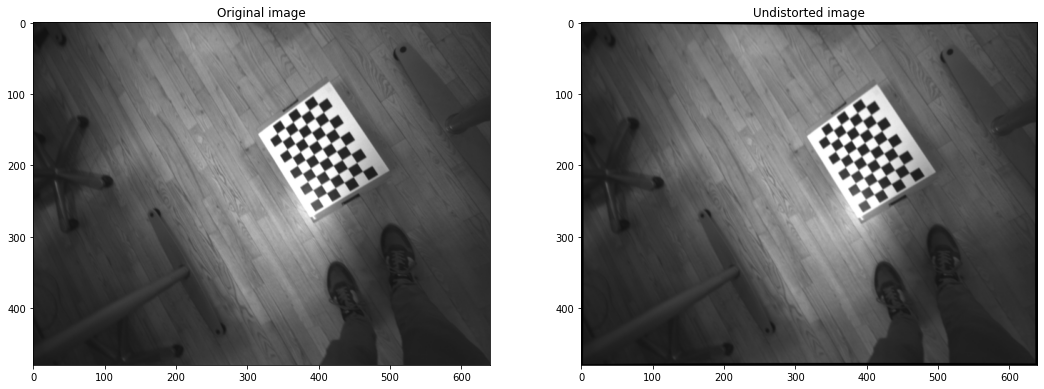

In [23]:
# undistort
dst = cv2.undistort(img, mtx_right, dist_right, None, K_right)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

### 2 - rectify the images!

In [ ]:
#cv2.stereoRectify(K_left, dist_left, K_right, dist_right, img.shape, )

C:\Users\henri\AppData\Local\Temp\ipykernel_27460\882636891.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


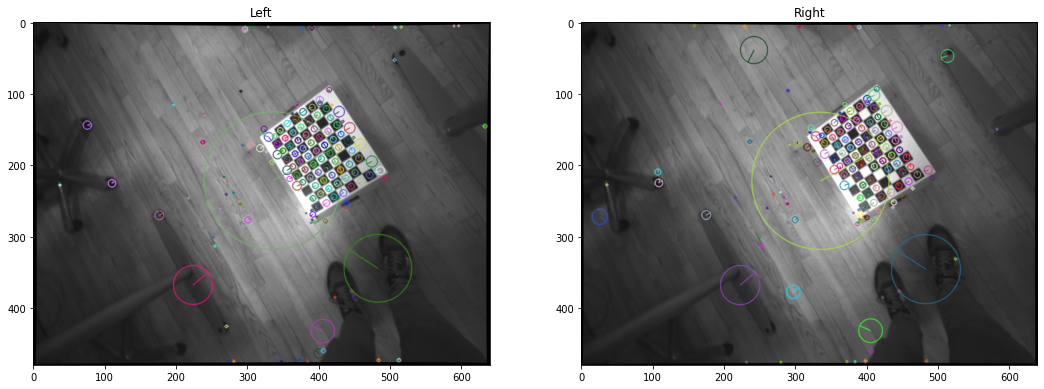

In [25]:
img_left = cv2.imread("rs/left-0000.png", 0)
img_right = cv2.imread("rs/right-0000.png", 0)

dst_left = cv2.undistort(img, mtx_left, dist_left, None, K_left)
dst_right = cv2.undistort(img, mtx_right, dist_right, None, K_right)


# Create a sift detector
sift = cv2.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp_left, des_left = sift.detectAndCompute(dst_left, None)
kp_right, des_right = sift.detectAndCompute(dst_right, None)

kp_img_1 = cv2.drawKeypoints(dst_left, kp_left, dst_left, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp_img_2 = cv2.drawKeypoints(dst_right, kp_right, dst_right, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(kp_img_1)
ax[0].set_title('Left')
ax[1].imshow(kp_img_2)
ax[1].set_title('Right')
fig.show()

In [26]:
"""
Then match the points
"""
bf = cv2.BFMatcher()
matches = bf.match(des_left, des_right)

# Sort them in the order of their distance (i.e. best matches first).
matches = sorted(matches, key = lambda x:x.distance)

In [27]:
nb_matches = 200

good = []
pts1 = []
pts2 = []

# Using 200 best matches
for m in matches[:nb_matches]:
    good.append(m)
    # Extract points corresponding to matches.
    pts1.append(kp_left[m.queryIdx].pt)
    pts2.append(kp_right[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

"""
Implement findFundamentalMat here:
"""
F, mask =cv2.findFundamentalMat(pts1, pts2, method=cv2.FM_RANSAC)

"""
Remove outlier points.
"""
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [28]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,2)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

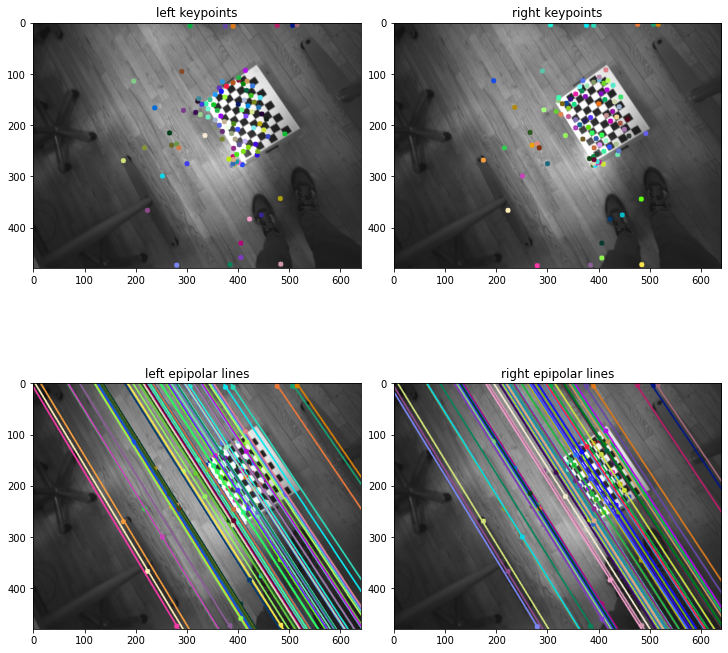

In [29]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img_left, img_right, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img_right, img_left, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()

In [30]:
F

array([[ 9.63888020e-06,  1.88738536e-05,  1.48985385e-01],
       [-2.40733024e-05, -6.27522844e-07, -9.11777729e-02],
       [-1.55286005e-01,  9.34950550e-02,  1.00000000e+00]])